# E-Commerce: Mengidentifikasi Profil Pelanggan

**Google Drive Dashboard** - https://drive.google.com/drive/folders/1nghgvhttzbKwg6MLoCnOIn5ZYLWjNIog?usp=drive_link

## Pendahuluan

Pengidentifikasian profil pelanggan memuat data riwayat transaksi dari **Everything Plus**, yakni sebuah toko daring yang menjual perlengkapan rumah tangga.

### Latar Belakang

Di era digitalisasi sekarang banyak sekali masyarakat pengguna gawai mulai dari handphone, tablet, maupun laptop/komputer sebagai daily driver mereka untuk mencari informasi yang luas atau juga sebagai mata pencaharian untuk sehari-hari mereka. Karena sekarang jual-beli barang sudah bisa mereka akses dengan mudah, cepat, dan terpercaya melalui media platform yang begitu banyak hanya di genggaman mereka. Salah satunya E-Commerse pada suatu Marketplace yang sudah banyak di gunakan masyarakat.

**Tugas**
Tentukan segmentasi pengguna berdasarkan profil mereka.
*	Lakukan analisis data eksploratif.
*	Tentukan segmentasi pengguna berdasarkan riwayat pembelian. Jangan ragu untuk mengimplementasikan ide Anda terkait segmentasi pengguna. Pertimbangkan cara agar segmentasi yang Anda lakukan dapat membantu Anda mengembangkan penawaran yang lebih personal untuk pengguna yang berbeda. Cobalah untuk membentuk segmentasi berdasarkan apa yang dibeli pengguna. Anda bisa menganalisis pembelian mereka dan mengelompokkan barang-barang yang dibeli berdasarkan kategori produk mereka.
*	Rumuskan dan lakukan pengujian hipotesis statistik.


### Detail Pengerjaan Tugas

Langkah yang diambil:

- [Pra-pemrosesan data itu sendiri beserta EDA-nya.](#pra)
- [Mempelajari data dengan melihat waktu peristiwa terhadap transaksi pengguna (melihat polanya).](#learn)
- [Menganalisis menggunakan RFM](#rfm)
- [Segmentasi Pengguna berdasarkan hasil RFM](#segment)
- [Analisis Item Pembelian](#item)
- [Merumuskan hipotesis untuk mengetahui tingkat loyalitas dari pengguna](#hipo)
- [Pengambilan kesimpulan secara umum.](#kesimpulan)

### Tujuan Proyek

Tujuan: Mencari tahu profil pengguna berdasarkan pola dan perilakunya untuk setiap transaksi yang dilakukan pengguna berdasarkan riwayat pembelian.

### Segmentasi RFM

Analisis RFM adalah teknik pemasaran yang digunakan untuk menentukan peringkat dan mengelompokkan pelanggan secara kuantitatif berdasarkan keterkinian, frekuensi, dan total uang dari transaksi terkini mereka untuk mengidentifikasi pelanggan terbaik dan melakukan kampanye pemasaran yang ditargetkan (Katie Terrell Hanna, 2024).
* Recency - Perbedaan antara tanggal referensi dan tanggal maksimum dalam kerangka data untuk setiap pelanggan (yaitu kunjungan terakhir)
* Frequency -  Mengetahui seberapa sering pelanggan melakukan pembelian, yang dapat membantu untuk mengidentifikasi pelanggan tetap.
* Monetary - Menunjukkan jumlah total yang dihabiskan oleh pelanggan untuk membeli produk dalam periode waktu tertentu.

Berdasarkan Nilai RFM, skor untuk setiap pelanggan yaitu antara 1 dan 3 (mengelompokkannya). 3 adalah skor terbaik dan 1 adalah skor terburuk (Surendra Tanniru, 2023):

| Segment | RFM | Deskripsi |
| --- | --- | --- |
| Best Customers | 333 | Membeli paling baru dan paling sering serta menghabiskan paling banyak |
| Loyal Customers | 1X1 | Membeli paling sering |
| Big Spenders | XX3 | Membeli paling banyak |
| Casual Customers | XXX | Average dari recency, frequency, maupun monetarynya |
| Almost Lost | 233 | Belum membeli untuk beberapa waktu tetapi ada riwayat pembelian banyak dan sering |
| Lost Customers | 133 | Terakhir pembelian cukup lama, tetapi ada riwayat pembelian banyak dan sering |
| Lost Cheap Customers | 111 | Terakhir pembelian cukup lama, membeli sedikit dan menghabiskan sedikit |


Ilustrasi berdasarkan sumbernya:

![Customer Segmentation RFM](72488Segments.png)

## Deskripsi Data

Dataframe `df` memuat:
   - `InvoiceNo` — ID pesanan
   - `StockCode` — Nama barang
   - `Description` — Nama item
   - `Quantity` — Kuantitas barang
   - `InvoiceDate` — Tanggal pemesanan
   - `UnitPrice` — Harga per barang
   - `CustomerID` — ID pelanggan

## Inisialisasi Library

Import library

In [327]:
import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta
from scipy import stats as st

Memuat dataset

In [328]:
try:
    df = pd.read_csv('ecommerce_dataset_us.csv', sep='\t')
except:
    df = pd.read_csv('/datasets/ecommerce_dataset_us.csv', sep='\t')

<a id='pra'></a>

## Mengenal dan Memperbaiki Data

Melihat informasi dataset, dimana memiliki total 541909 baris data dan 7 kolom.

In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


In [330]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,11/29/2018 08:26,7.65,17850.0
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,11/29/2018 08:26,4.25,17850.0
7,536366,22633,HAND WARMER UNION JACK,6,11/29/2018 08:28,1.85,17850.0
8,536366,22632,HAND WARMER RED POLKA DOT,6,11/29/2018 08:28,1.85,17850.0
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,11/29/2018 08:34,1.69,13047.0


Pada dataset terlihat ada nilai minus. Nilai kolom Kuantitas dan Harga Satuan harus Positif. Kita hilangkan nilai tersebut juga catatan dengan nilai negatif untuk Kuantitas dan Harga Satuan

In [331]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [332]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

Sekarang dataset sudah tidak memiliki nilai minus

Data duplikat terhitung memiliki 5268 nilai dan untuk nilai missing pada kolom CustomerID terdapat 25% data missing lalu kolom Description sejumlah 1454 data.

In [333]:
df.duplicated().sum()

5226

In [334]:
report_null = df.isnull().sum().to_frame()
report_null = report_null.rename(columns={0:'missing_values'})
report_null['% of total'] = (report_null['missing_values'] / df.shape[0]).round(2)
report_null.sort_values(by='missing_values', ascending=False)

,missing_values,% of total
CustomerID,132220,0.25
InvoiceNo,0,0.00
StockCode,0,0.00
Description,0,0.00
Quantity,0,0.00
InvoiceDate,0,0.00
UnitPrice,0,0.00


In [335]:
df = df.drop_duplicates()

In [336]:
df = df.dropna(subset=['Description', 'CustomerID'])

Kita eliminasi data duplikat serta untuk nilai missing juga kita eliminasi walaupun terdapat 25% nilai missing dikarenakan tidak dapat digunakan untuk menganalisis profil pelanggan tersebut.

In [337]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [338]:
df['CustomerID'] = df['CustomerID'].astype('int')

Merubah tipe data InvoiceDate ke datetime dan CustomerID ke integer

In [339]:
df['total'] = df['Quantity'] * df['UnitPrice']

Kita tambahkan kolom baru untuk menghitung jumlah pembelian total tiap kuantitas barang

In [340]:
df.columns = ['invoice', 'stock_code', 'description', 'quantity', 'invoice_date', 'unit_price', 'customer_id', 'total']

Kita modifikasi sedikit nama kolom guna efisiensi pengerjaan
<a id='learn'></a>

## Mempelajari Parameter Data

Menambahkan kolom baru untuk parameter tanggal bulan dan hari

In [341]:
df['invoice_month'] = df['invoice_date'].dt.month
df['invoice_day'] = df['invoice_date'].dt.date

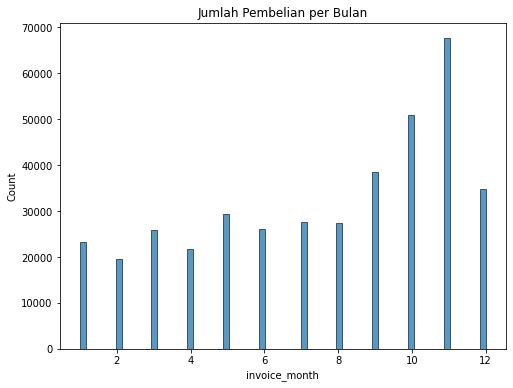

In [342]:
plt.figure(figsize=(8, 6))
plt.title('Jumlah Pembelian per Bulan')
sns.histplot(df['invoice_month'])
plt.show()

Total transaksi selama satu tahun dalam bulan:
- Terlihat pada bulan ke-11 memiliki jumlah transaksi terbanyak hampir mendekati nilai 70000.
- Diagram menunjukkan hasil yang naik turun walaupun cenderung terus meningkat setiap bulannya.

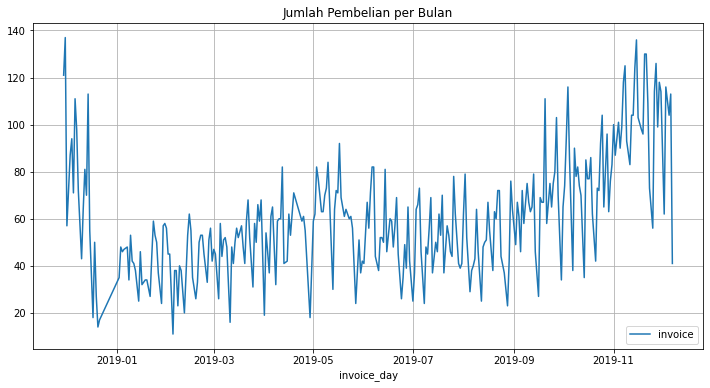

In [343]:
days_sales = (
    df.groupby(['invoice_day'])
    .agg({'invoice': 'nunique'})
    .reset_index()
)
days_sales.plot(x='invoice_day', y='invoice', style='-', title='Jumlah Pembelian per Bulan', grid=True, figsize=(12, 6))
plt.show()

Total transaksi selama satu tahun dalam hari:
- Pada bulan ke-10 terlihat lebih banyak yang melakukan transaksi dengan nilai 175 lebih pelanggan berbeda.
- Pada awal tahun 2018 - 2019 bulan ke-1 terdapat lompatan yang cukup jauh, apakah di waktu tersebut tidak terjadinya transaksi oleh pelanggan? 

Mencari tahu item apa yang paling banyak dibeli oleh seluruh pelanggan

In [344]:
cus_description = df.groupby('description')['customer_id'].nunique().sort_values(ascending=False)
cus_description = cus_description[:10].reset_index()
cus_description

,description,customer_id
0,REGENCY CAKESTAND 3 TIER,881
1,WHITE HANGING HEART T-LIGHT HOLDER,856
2,PARTY BUNTING,708
3,ASSORTED COLOUR BIRD ORNAMENT,678
4,SET OF 3 CAKE TINS PANTRY DESIGN,640
5,PACK OF 72 RETROSPOT CAKE CASES,635
6,JUMBO BAG RED RETROSPOT,635
7,PAPER CHAIN KIT 50'S CHRISTMAS,613
8,NATURAL SLATE HEART CHALKBOARD,587
9,BAKING SET 9 PIECE RETROSPOT,581


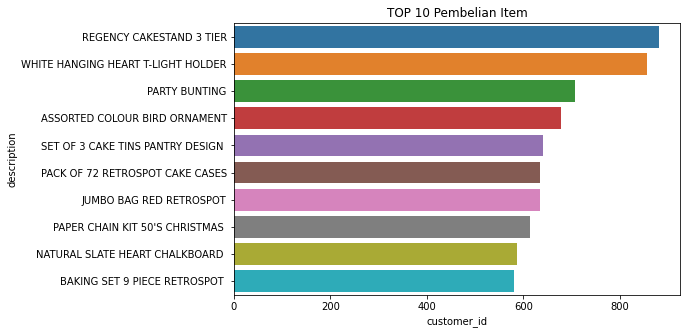

In [345]:
plt.figure(figsize=(8, 5))
plt.title('TOP 10 Pembelian Item')
sns.barplot(data=cus_description, y='description', x='customer_id')
plt.show()

10 Item yang terjual paling banyak:
- REGENCY CAKESTAND 3 TIER	dan WHITE HANGING HEART T-LIGHT HOLDER merupakan item paling laris dari 800 pelanggan lebih yang membelinya.
- Pada urutan ke-10 ada BAKING SET 9 PIECE RETROSPOT dengan 500 pelanggan lebih.
- Item-item tersebut merupakan penjualan selama 1 tahun, apakah pada setiap bulannya akan berbeda jumlah dan jenis itemnya?
<a id='rfm'></a>

## Merumuskan RFM

### Recency

Melihat tanggal invoice akhir untuk mencari tahu tanggal referensinya guna merumuskan recency pelanggan

In [346]:
str(df['invoice_date'].max())

'2019-12-07 12:50:00'

In [347]:
reference_date = df['invoice_date'].max() + timedelta(days=1)

In [348]:
df_recency = df.groupby(by='customer_id', as_index=False)['invoice_date'].max()
df_recency.columns = ['customer_id','max_date']
df_recency.head()

,customer_id,max_date
0,12346,2019-01-16 10:01:00
1,12347,2019-12-05 15:52:00
2,12348,2019-09-23 13:13:00
3,12349,2019-11-19 09:51:00
4,12350,2019-01-31 16:01:00


Sekarang kita akan menghitung nilai recencynya

In [349]:
df_recency['Recency'] = df_recency['max_date'].apply(lambda row: (reference_date - row).days)
df_recency.drop('max_date', inplace=True, axis=1)
df_recency[['customer_id', 'Recency']].head()

,customer_id,Recency
0,12346,326
1,12347,2
2,12348,75
3,12349,19
4,12350,310


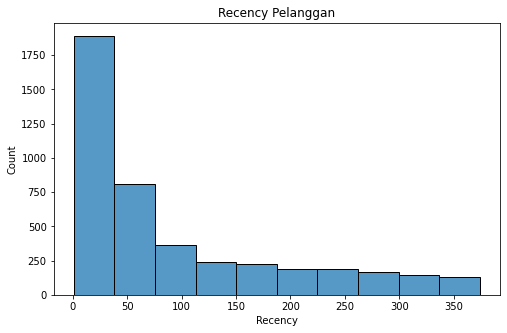

In [350]:
plt.figure(figsize=(8, 5))
plt.title('Recency Pelanggan')
sns.histplot(df_recency.Recency, bins=10)
plt.show()

Recency Pelanggan:
- Pelanggan dengan pembelian terakhir terjadi pada satu hingga dua bulan lampau terbanyak.
- Pelanggan dengan pembelian terakhir mendekati satu tahun juga cukup banyak pada grafik.

### Frequency

Sekarang kita akan menghitung nilai frequencynya

In [351]:
df_frequency = df.groupby(by='customer_id', as_index=False)['invoice'].nunique()
df_frequency.columns = ['customer_id','Frequency']
df_frequency.head()

,customer_id,Frequency
0,12346,1
1,12347,7
2,12348,4
3,12349,1
4,12350,1


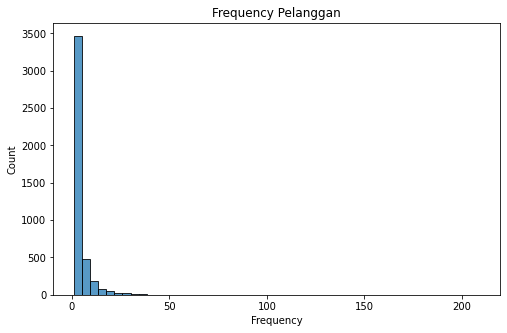

In [352]:
plt.figure(figsize=(8, 5))
plt.title('Frequency Pelanggan')
sns.histplot(df_frequency.Frequency, bins=50)
plt.show()

Frequency Pelanggan:
- Rata-rata pelanggan melakukan pembelian paling banyak 1-10 item.
- Pelanggan dengan pembelian item 50 hingga yang paling banyak 200 unit juga masuk dalam grafik, mengindikasikan adanya nilai outlier untuk beberapa pelanggan.

### Monetary

Sekarang kita akan menghitung nilai monetarynya

In [353]:
df_monetary = df.groupby(by='customer_id', as_index=False)['total'].sum()
df_monetary.columns = ['customer_id','Monetary']
df_monetary.head()

,customer_id,Monetary
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


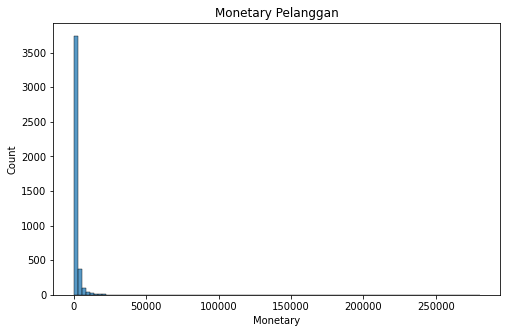

In [354]:
plt.figure(figsize=(8, 5))
plt.title('Monetary Pelanggan')
sns.histplot(df_monetary.Monetary, bins=100)
plt.show()

Monetary Pelanggan:
- Jumlah rata-rata pelanggan menggunakan uangnya untuk pembelian paling banyak tidak lebih dari 1000 dolar.
- Nilai monetary paling tinggi terdapat pada 250000 dolar dalam grafik, mengindikasikan adanya nilai outlier untuk beberapa pelanggan.

### Recency Vs Frequency

Kita akan melihat perbandingan nilai Recency terhadap nilai Frequency pelanggan

In [355]:
r_f = pd.merge(df_recency, df_frequency, on='customer_id')
r_f_m = pd.merge(r_f, df_monetary, on='customer_id')
r_f_m.head()

,customer_id,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12347,2,7,4310.00
2,12348,75,4,1797.24
3,12349,19,1,1757.55
4,12350,310,1,334.40


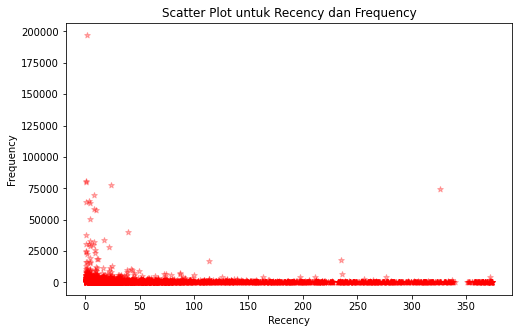

In [356]:
plt.figure(figsize=(8, 5))
plt.scatter(r_f_m.groupby('customer_id')['Recency'].sum(), df.groupby('customer_id')['quantity'].sum(),
            color = 'red',
            marker = '*', alpha = 0.3)

plt.title('Scatter Plot untuk Recency dan Frequency') 
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

Recency dan Frequency Pelanggan:
- Kita dapat melihat pelanggan yang nilai Recencynya kurang dari sebulan memiliki Frekuensi yang tinggi, ini mengindikasikan  bahwa pelanggan membeli lebih banyak ketika nilai Recencynya kecil.

### Frequency Vs Monetary

Selanjutnya kita akan melihat perbandingan nilai Frequency terhadap nilai Monetary pelanggan

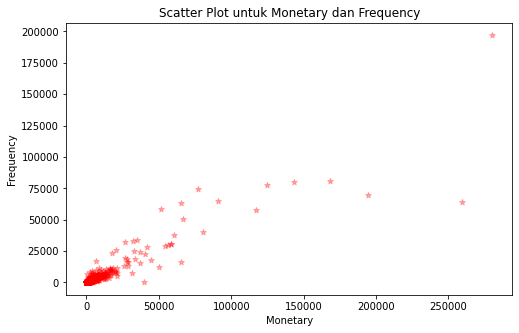

In [357]:
market_data = df.groupby('customer_id')[['quantity', 'total']].sum()

plt.figure(figsize=(8, 5))
plt.scatter(market_data['total'], market_data['quantity'],
            color = 'red',
            marker = '*', alpha = 0.3)

plt.title('Scatter Plot untuk Monetary dan Frequency')
plt.xlabel('Monetary')
plt.ylabel('Frequency')
plt.show()

Monetary dan Frequency Pelanggan:
- Kita bisa melihat, pelanggan yang sering membeli menghabiskan uangnya lebih sedikit pula. Hal ini mengindikasikan pelanggan lebih sering membeli item yang harganya lebih murah.

### Recency Vs Frequency Vs Monetary

Terakhir kita lihat nilai RFM secara persebaran datanya

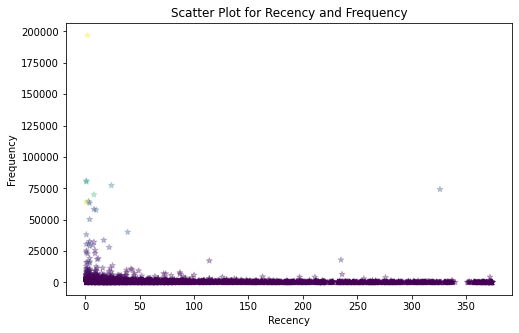

In [358]:
Monetary = df.groupby('customer_id')['total'].sum()

plt.figure(figsize=(8, 5))
plt.scatter(r_f_m.groupby('customer_id')['Recency'].sum(), df.groupby('customer_id')['quantity'].sum(),
            marker = '*', alpha = 0.3, c = Monetary)

plt.title('Scatter Plot for Recency and Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

Recency, Monetary, dan Frequency Pelanggan:
- Pada warna plot menentukan Moneter. Dari plot di atas dapat dikatakan bahwa pelanggan yang Recencynya lebih rendah memiliki Frekuensi yang tinggi tetapi Moneternya lebih sedikit.
<a id='segment'></a>

## Segmentasi Pengguna

Setelah mencari nilai Recency, Frequency, dan Monetary dari pelanggan, sekarang bisa kita segmentasikan berdasarkan profil dari setiap pelanggan. Untuk membantu kita memperbaiki tepi bin, mari gunakan nilai kuantil kolom “Recency”, “Frequency”, dan “MonetaryValue” (Bala Priya C, 2023).

Nilai Recency, Frequency, dan Monetary akan kita gunakan pada quantile dari data pada 33% untuk nilai minimum dan 66% untuk nilai menengah, dan lainnya untuk nilai maksimumnya.

In [359]:
r_f_m[['Recency', 'Frequency', 'Monetary']].quantile([.33, .66, .9])

,Recency,Frequency,Monetary
0.33,25.0,1.0,384.1010
0.66,88.0,4.0,1154.4294
0.90,263.0,9.0,3640.8410


In [360]:
def R_Score(x):
    if x['Recency'] <= 30:
        return 3
    elif x['Recency'] <= 90:
        return 2
    else:
        return 1

def F_Score(x):
    if x['Frequency'] <= 1:
        return 1
    elif x['Frequency'] <= 4:
        return 2
    else:
        return 3

def M_Score(x):
    if x['Monetary'] <= 384:
        return 1
    elif x['Monetary'] <= 1154:
        return 2
    else:
        return 3

r_f_m['R'] = r_f_m.apply(R_Score, axis=1)
r_f_m['F'] = r_f_m.apply(F_Score, axis=1)
r_f_m['M'] = r_f_m.apply(M_Score, axis=1)
r_f_m['RFM_Score'] = r_f_m['R'].map(str) + r_f_m['F'].map(str) + r_f_m['M'].map(str)

In [361]:
r_f_m.head()

,customer_id,Recency,Frequency,Monetary,R,F,M,RFM_Score
0,12346,326,1,77183.60,1,1,3,113
1,12347,2,7,4310.00,3,3,3,333
2,12348,75,4,1797.24,2,2,3,223
3,12349,19,1,1757.55,3,1,3,313
4,12350,310,1,334.40,1,1,1,111


Sekarang kita sudah memiliki nilai dari RFM untuk setiap pelanggannya. Langkah selanjutnya kita kelompokkan setiap pelanggan terhadap segmentasinya berdasarkan nilai RFM yang dimilikinya.

In [362]:
segment = [0]*len(r_f_m)

for i in range(0,len(r_f_m)):
    if r_f_m['RFM_Score'][i]=='111':
        segment[i]='Lost Cheap'
    elif r_f_m['RFM_Score'][i]=='133':
        segment[i]='Lost'    
    elif (r_f_m['RFM_Score'][i]=='131') | (r_f_m['RFM_Score'][i]=='121'):
        segment[i]='Loyal'
    elif (r_f_m['RFM_Score'][i]=='113') | (r_f_m['RFM_Score'][i]=='123'):
        segment[i]='Big Spend'
    elif (r_f_m['RFM_Score'][i]=='213') | (r_f_m['RFM_Score'][i]=='313'):
        segment[i]='Big Spend'
    elif (r_f_m['RFM_Score'][i]=='223') | (r_f_m['RFM_Score'][i]=='323'):
        segment[i]='Big Spend'
    elif r_f_m['RFM_Score'][i]=='233':
        segment[i]='Almost Lost'
    elif r_f_m['RFM_Score'][i]=='333':
        segment[i]='Best'
    else:
        segment[i]='Casual'
        
r_f_m['Segment'] = segment

In [363]:
r_f_m.head()

,customer_id,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment
0,12346,326,1,77183.60,1,1,3,113,Big Spend
1,12347,2,7,4310.00,3,3,3,333,Best
2,12348,75,4,1797.24,2,2,3,223,Big Spend
3,12349,19,1,1757.55,3,1,3,313,Big Spend
4,12350,310,1,334.40,1,1,1,111,Lost Cheap


In [364]:
r_f_m['Segment'].value_counts()

Casual         2076
Best            716
Lost Cheap      647
Big Spend       495
Almost Lost     219
Loyal           139
Lost             46
Name: Segment, dtype: int64

In [365]:
r_f_m = r_f_m.set_index('customer_id')

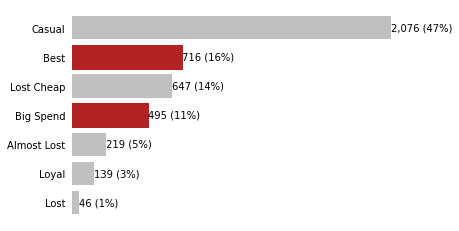

In [366]:
segments_counts = r_f_m['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['Best', 'Big Spend']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

Segmentasi RFM:
- Terlihat pada segmentasinya ternyata pelanggan dengan segmentasi Casual memiliki jumlah yang paling banyak dengan presentasi di 47% secara keseluruhan.
- Distribusi pelanggan seperti ini cukup normal dan cukup baik, mengingat tingkat lost/almost lost/lost cheap pelanggan lebih sedikit dengan tingkat pelanggan best/big spend/lotal maupun casual yang masih tinggi.
<a id='item'></a>

## Menganalisis Item Pembelian per Segment

Pertama kita akan membuat variabel baru untuk setiap segmentnya, disini kita gunakan 3 sample dari 'Best', 'Big Spend', dan 'Casual'. Variabel tersebut akan kita gunakan untuk mencari tahu perbedaan pola dari pelanggan.

data segment kita merge dengan dataset awal untuk menghitung secara keseluruhan transaksi.

In [367]:
r_f_m = r_f_m.reset_index()
rfm_segment = r_f_m[['customer_id', 'Segment']]
rfm_segment.head()

,customer_id,Segment
0,12346,Big Spend
1,12347,Best
2,12348,Big Spend
3,12349,Big Spend
4,12350,Lost Cheap


In [368]:
df2 = pd.merge(df, rfm_segment, how='left', on='customer_id')

In [369]:
InvoiceBest = df2[df2['Segment']=='Best'][['customer_id', 'description', 'unit_price', 'quantity', 'total']]
InvoiceBig = df2[df2['Segment']=='Big Spend'][['customer_id', 'description', 'unit_price', 'quantity', 'total']]
InvoiceCas = df2[df2['Segment']=='Casual'][['customer_id', 'description', 'unit_price', 'quantity', 'total']]

### Best Customers

Menghitung jumlah pelanggan, jumlah barang, dan biaya item yang dikeluarkan oleh pelanggan berdasarkan segment 'Best'.

In [370]:
item_best = InvoiceBest.groupby(['description']).agg({'customer_id': 'nunique', 'quantity': 'sum', 'total': 'sum'}).sort_values(by='customer_id', ascending=False)
item_best = item_best[:10].reset_index()
item_best

,description,customer_id,quantity,total
0,REGENCY CAKESTAND 3 TIER,256,8631,97990.20
1,WHITE HANGING HEART T-LIGHT HOLDER,256,22990,63345.40
2,JUMBO BAG RED RETROSPOT,248,31543,57698.49
3,PACK OF 72 RETROSPOT CAKE CASES,245,18978,9244.00
4,LUNCH BAG RED RETROSPOT,238,11945,18787.65
5,PARTY BUNTING,222,8932,39444.48
6,PAPER CHAIN KIT 50'S CHRISTMAS,216,10197,27735.83
7,ASSORTED COLOUR BIRD ORNAMENT,214,23435,36846.11
8,SET OF 3 CAKE TINS PANTRY DESIGN,212,4680,22112.00
9,LUNCH BAG BLACK SKULL.,207,7775,12283.15


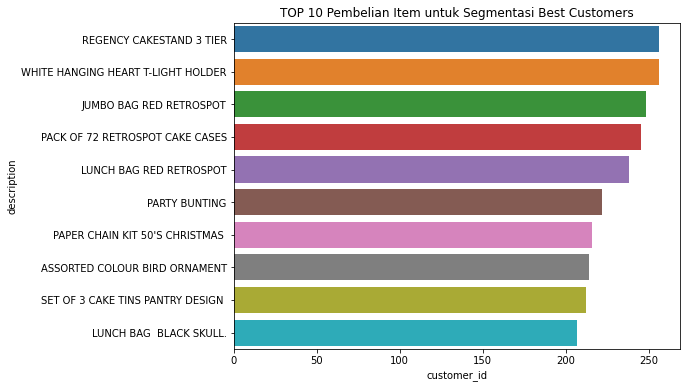

In [371]:
plt.figure(figsize=(8, 6))
plt.title('TOP 10 Pembelian Item untuk Segmentasi Best Customers')
sns.barplot(data=item_best, y='description', x='customer_id')
plt.show()

TOP 10 Item pada segmentasi Best Customers:
- Item REGENCY CAKESTAND 3 TIER merupakan yang paling sering dibeli oleh kelompok Best Customers dengan total 289 pelanggan berbeda.
- Dilanjutkan pada peringkat ke-2 WHITE HANGING HEART T-LIGHT HOLDER dengan 274 pelanggan, dan peringkat ke-3 JUMBO BAG RED RETROSPOT dengan 266 pelanggan.

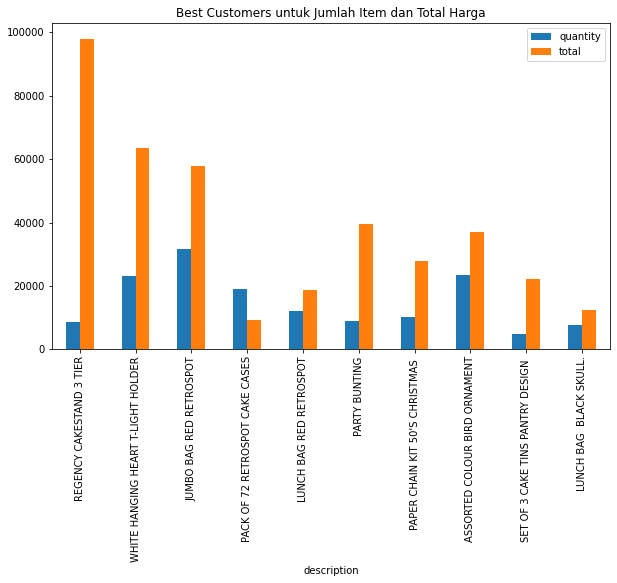

In [372]:
item_best.drop('customer_id', axis=1).plot(kind='bar', x='description', figsize=(10, 6), title='Best Customers untuk Jumlah Item dan Total Harga')
plt.show()

Quantity dan Total Price segment Best Customers:
- Kuantitas item JUMBO BAG RED RETROSPOT merupakan yang paling banyak terjual (28559 item)
- Total biaya pelanggannya tertinggi ada di item REGENCY CAKESTAND 3 TIER dengan 12288 dolar walaupun kuantitasnya cukup kecil.

### Big Spender

Menghitung jumlah pelanggan, jumlah barang, dan biaya item yang dikeluarkan oleh pelanggan berdasarkan segment 'Big Spend'.

In [373]:
item_big = InvoiceBig.groupby(['description']).agg({'customer_id': 'nunique', 'quantity': 'sum', 'total': 'sum'}).sort_values(by='customer_id', ascending=False)
item_big = item_big[:10].reset_index()
item_big

,description,customer_id,quantity,total
0,REGENCY CAKESTAND 3 TIER,163,983,11870.85
1,JAM MAKING SET WITH JARS,118,1116,4461.00
2,PACK OF 72 RETROSPOT CAKE CASES,114,4078,2071.30
3,JUMBO BAG RED RETROSPOT,111,6005,11188.90
4,PARTY BUNTING,109,1500,6939.00
5,SPOTTY BUNTING,106,860,4137.00
6,JAM MAKING SET PRINTED,103,2380,3388.40
7,WHITE HANGING HEART T-LIGHT HOLDER,102,6457,16662.25
8,BAKING SET 9 PIECE RETROSPOT,100,558,2661.30
9,ASSORTED COLOUR BIRD ORNAMENT,98,3457,5727.13


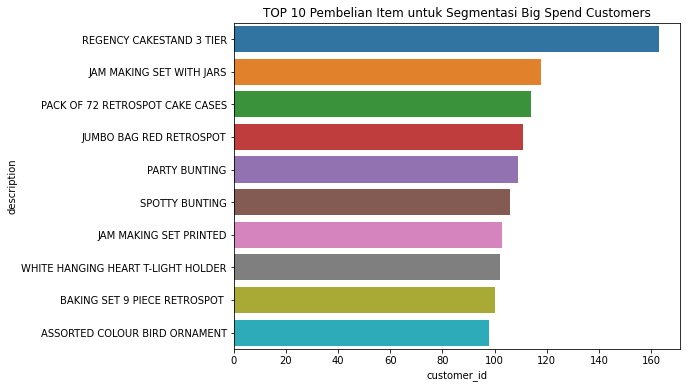

In [374]:
plt.figure(figsize=(8, 6))
plt.title('TOP 10 Pembelian Item untuk Segmentasi Big Spend Customers')
sns.barplot(data=item_big, y='description', x='customer_id')
plt.show()

TOP 10 Item pada segmentasi Big Spend Customers:
- Item REGENCY CAKESTAND 3 TIER merupakan yang paling sering dibeli oleh kelompok Big Spend Customers dengan total 163 pelanggan berbeda.
- Dilanjutkan pada peringkat ke-2 JAM MAKING SET WITH JARS dengan 118 pelanggan, dan peringkat ke-3 PACK OF 72 RETROSPOT CAKE CASES dengan 114 pelanggan.
- Perbedaannya tidak terlalu jauh antar item.

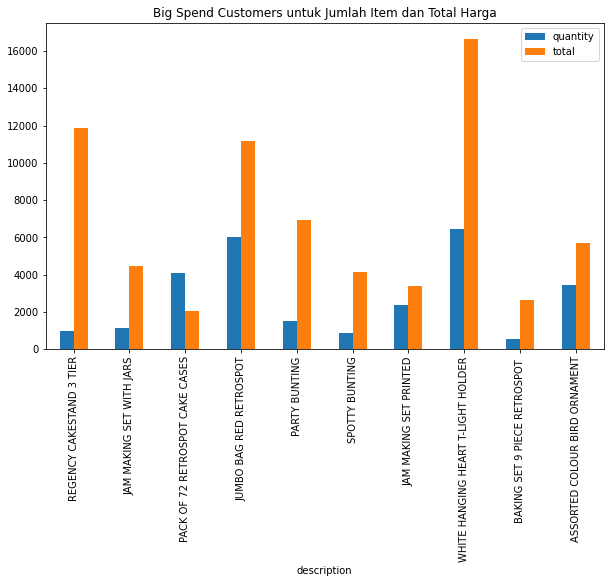

In [375]:
item_big.drop('customer_id', axis=1).plot(kind='bar', x='description', figsize=(10, 6), title='Big Spend Customers untuk Jumlah Item dan Total Harga')
plt.show()

Quantity dan Total Price segment Big Spend Customers:
- Kuantitas item WHITE HANGING HEART T-LIGHT HOLDER merupakan yang paling banyak terjual (6457 item)
- Total biaya pelanggannya tertinggi ada di item WHITE HANGING HEART T-LIGHT HOLDER dengan 16662.25 dolar.

### Casual

Menghitung jumlah pelanggan, jumlah barang, dan biaya item yang dikeluarkan oleh pelanggan berdasarkan segment 'Casual'.

In [376]:
item_cas = InvoiceCas.groupby(['description']).agg({'customer_id': 'nunique', 'quantity': 'sum', 'total': 'sum'}).sort_values(by='customer_id', ascending=False)
item_cas = item_cas[:10].reset_index()
item_cas

,description,customer_id,quantity,total
0,WHITE HANGING HEART T-LIGHT HOLDER,314,3982,11222.10
1,REGENCY CAKESTAND 3 TIER,288,1067,13035.45
2,ASSORTED COLOUR BIRD ORNAMENT,258,5091,8411.79
3,REX CASH+CARRY JUMBO SHOPPER,254,733,696.35
4,BAKING SET 9 PIECE RETROSPOT,234,968,4741.20
5,PAPER CHAIN KIT 50'S CHRISTMAS,231,2241,6290.95
6,PARTY BUNTING,227,1613,7754.75
7,SET OF 3 CAKE TINS PANTRY DESIGN,213,799,3887.85
8,HEART OF WICKER SMALL,209,2273,3678.45
9,NATURAL SLATE HEART CHALKBOARD,192,1272,3733.20


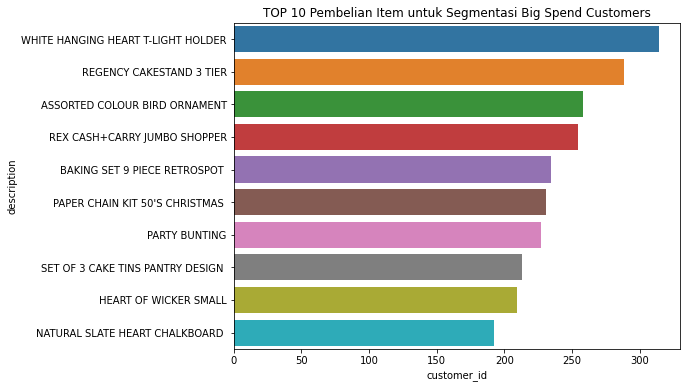

In [377]:
plt.figure(figsize=(8, 6))
plt.title('TOP 10 Pembelian Item untuk Segmentasi Big Spend Customers')
sns.barplot(data=item_cas, y='description', x='customer_id')
plt.show()

TOP 10 Item pada segmentasi Casual Customers:
- Item WHITE HANGING HEART T-LIGHT HOLDER merupakan yang paling sering dibeli oleh kelompok Casual Customers dengan total 280 pelanggan berbeda.
- Dilanjutkan pada peringkat ke-2 REGENCY CAKESTAND 3 TIER dengan 254 pelanggan, dan peringkat ke-3 ASSORTED COLOUR BIRD ORNAMENT dengan 231 pelanggan.

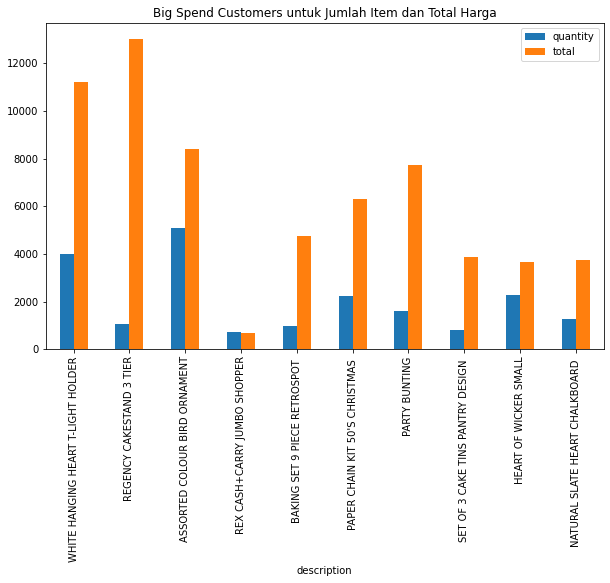

In [378]:
item_cas.drop('customer_id', axis=1).plot(kind='bar', x='description', figsize=(10, 6), title='Big Spend Customers untuk Jumlah Item dan Total Harga')
plt.show()

Quantity dan Total Price segment Casual Customers:
- Kuantitas item ASSORTED COLOUR BIRD ORNAMENT merupakan yang paling banyak terjual (5091 item)
- Total biaya pelanggannya tertinggi ada di item REGENCY CAKESTAND 3 TIER dengan 13035.45 dolar walaupun kuantitasnya cukup kecil.
<a id='hipo'></a>

## Uji Hipotesis

Pengujian hipotesis kali ini kita akan menggunakan uji-z, dimana uji ini lebih praktis dibandingkan uji-t yang memiliki nilai kritis berbeda untuk setiap ukuran sampel, sedangkan uji z memiliki nilai kritis tunggal untuk setiap tingkat signifikansi (misalnya, 1,96 untuk 5% dua sisi). Oleh karena itu, untuk ukuran sampel yang besar dan varians populasi yang diketahui, banyak uji statistik dilakukan menggunakan uji z perkiraan (Angel Das, 2022). Pada pengujian hipotesis statistik kali ini merujuk pada:
- Setiap segmentasi pengguna (disini kita pilih 3 segment Best, Big Spend, dan Casual).
- 4 Jenis Item dari ketiga segment yang paling populer yaitu "WHITE HANGING HEART T-LIGHT HOLDER", "REGENCY CAKESTAND 3 TIER", "PARTY BUNTING", dan "ASSORTED COLOUR BIRD ORNAMENT".
- Invoice dari customers

Pertama kita akan membuat 2 tabel untuk pengujiannya. Uji yang pertama pada segment Casual dengan Best, dan uji yang kedua pada segment Casual dengan Big Spend. Pengujian dilakukan berdasarkan jumlah dari jenis item yang terjual untuk setiap uji dengan tujuan untuk menyesuaikan H0 dan Ha.

In [379]:
filter_ = df2.query('description == ("WHITE HANGING HEART T-LIGHT HOLDER", "REGENCY CAKESTAND 3 TIER", "PARTY BUNTING", "ASSORTED COLOUR BIRD ORNAMENT")')

In [380]:
segment_invoice = (filter_.pivot_table(index='Segment', values='invoice', aggfunc='nunique'))
segment_invoice['ratio_%'] = segment_invoice['invoice'] / segment_invoice['invoice'].sum() * 100
segment_invoice.sort_values(by='invoice', ascending=False)

,invoice,ratio_%
Segment,,
Best,2589,50.058005
Casual,1217,23.530549
Big Spend,522,10.092807
Almost Lost,484,9.358082
Lost Cheap,180,3.480278
Lost,120,2.320186
Loyal,60,1.160093


In [381]:
segment_item = (filter_.pivot_table(index='description', columns='Segment', values='invoice', aggfunc='nunique').sort_values(by='Best', ascending=False))
segment_item

Segment,Almost Lost,Best,Big Spend,Casual,Lost,Lost Cheap,Loyal
description,,,,,,,
WHITE HANGING HEART T-LIGHT HOLDER,166,1008,179,459,57,82,20
REGENCY CAKESTAND 3 TIER,177,827,223,365,37,54,20
PARTY BUNTING,170,672,154,278,37,50,18
ASSORTED COLOUR BIRD ORNAMENT,127,663,164,346,25,39,11


Disini kita bikin fungsi untuk di aplikasikan ke setiap bahan ujinya.

In [382]:
def check_hypothesis(successes1, successes2, trials1, trials2, alpha=0.05):
    p1 = successes1 / trials1
    p2 = successes2 / trials2
    p_combined = (successes1 + successes2) / (trials1 + trials2)
    difference = p1 - p2
    
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1 / trials1 + 1 / trials2))
    distr =  st.norm(0, 1)
    
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    print('p-value: ', p_value)
    if (p_value < alpha):
        print("Menolak hipotesis nol: Ada perbedaan yang signifikan di antara proporsinya")
    else:
        print("Gagal untuk menolak hipotesis nol: Tidak ada perbedaan yang signifikan di antara proporsinya")

In [383]:
def check_event_hypothesis(segment_item, segment_invoice, event, exp1, exp2):
    print(f'Jenis Item: {event}, Segment: {exp1}')
    print(f'Jenis Item: {event}, Segment: {exp2}')
    check_hypothesis(segment_item.loc[event, exp1], 
                 segment_item.loc[event, exp2], 
                 segment_invoice.loc[exp1, 'invoice'], 
                 segment_invoice.loc[exp2, 'invoice'])

### Uji pada Segment Best dan Casual

Tabel pertama untuk segment Best dan Casual dengan pengujian berdasarkan jenis item yang terjual per harinya.


Uji Statistik : Two sample z-test independent

Hipotesis :
   - H0 = Apabila rata-rata pembelian item tertentu pada segment Best dan Casual Sama
   - H1 = Apabila rata-rata pembelian item tertentu pada segment Best dan Casual Tidak Sama
   
Alpha : 5% / 0.05

In [384]:
for event in segment_item.index:
    check_event_hypothesis(segment_item, segment_invoice, event, 'Best', 'Casual')
    print('-----------------------------------------------------------')

Jenis Item: WHITE HANGING HEART T-LIGHT HOLDER, Segment: Best
Jenis Item: WHITE HANGING HEART T-LIGHT HOLDER, Segment: Casual
p-value:  0.47140049825586794
Gagal untuk menolak hipotesis nol: Tidak ada perbedaan yang signifikan di antara proporsinya
-----------------------------------------------------------
Jenis Item: REGENCY CAKESTAND 3 TIER, Segment: Best
Jenis Item: REGENCY CAKESTAND 3 TIER, Segment: Casual
p-value:  0.22613109005499044
Gagal untuk menolak hipotesis nol: Tidak ada perbedaan yang signifikan di antara proporsinya
-----------------------------------------------------------
Jenis Item: PARTY BUNTING, Segment: Best
Jenis Item: PARTY BUNTING, Segment: Casual
p-value:  0.03849648629764424
Menolak hipotesis nol: Ada perbedaan yang signifikan di antara proporsinya
-----------------------------------------------------------
Jenis Item: ASSORTED COLOUR BIRD ORNAMENT, Segment: Best
Jenis Item: ASSORTED COLOUR BIRD ORNAMENT, Segment: Casual
p-value:  0.06581331464256013
Gagal u

Hipotesis Kelompok Best dan Casual:
- Pada jenis item bunting hipotesisnya adalah menolak hipotesis nol dengan p-value di 0.03.
- Sedangkan pada jenis item holder, cakestand dan ornament nilai p-valuenya 0.47, 0.22 dan 0.06 yang dimana gagal Menolak hipotesis nol.
- Pada jenis item holder, cakestand dan ornament memiliki perbedaan yang signifikan di antara proporsinya yang mengindikasikan pelanggan pada proporsi kelompok Best lebih tinggi daripada kelompok Casual. Artinya pula pada kelompok Best lebih banyak pelanggan yang melakukan transaksi daripada kelompok Casual untuk jenis item tersebut. Berlaku sebaliknya bagi kelompok pada jenis item bunting.

### Uji pada Segment Best dan Big Spend

Tabel pertama untuk segment Best dan Big Spend dengan pengujian berdasarkan jenis item yang terjual per harinya.


Uji Statistik : Two sample z-test independent

Hipotesis :
   - H0 = Apabila rata-rata pembelian item tertentu pada segment Best dan Big Spend Sama
   - H1 = Apabila rata-rata pembelian item tertentu pada segment Best dan Big Spend Tidak Sama
   
Alpha : 5% / 0.05

In [385]:
for event in segment_item.index:
    check_event_hypothesis(segment_item, segment_invoice, event, 'Best', 'Big Spend')
    print('-----------------------------------------------------------')

Jenis Item: WHITE HANGING HEART T-LIGHT HOLDER, Segment: Best
Jenis Item: WHITE HANGING HEART T-LIGHT HOLDER, Segment: Big Spend
p-value:  0.046365710930915016
Menolak hipotesis nol: Ada perbedaan yang signifikan di antara proporsinya
-----------------------------------------------------------
Jenis Item: REGENCY CAKESTAND 3 TIER, Segment: Best
Jenis Item: REGENCY CAKESTAND 3 TIER, Segment: Big Spend
p-value:  2.0296704306144164e-06
Menolak hipotesis nol: Ada perbedaan yang signifikan di antara proporsinya
-----------------------------------------------------------
Jenis Item: PARTY BUNTING, Segment: Best
Jenis Item: PARTY BUNTING, Segment: Big Spend
p-value:  0.09421009446085571
Gagal untuk menolak hipotesis nol: Tidak ada perbedaan yang signifikan di antara proporsinya
-----------------------------------------------------------
Jenis Item: ASSORTED COLOUR BIRD ORNAMENT, Segment: Best
Jenis Item: ASSORTED COLOUR BIRD ORNAMENT, Segment: Big Spend
p-value:  0.006129503330864594
Menolak 

Hipotesis Kelompok Best dan Big Spend:
- Pada jenis item holder, cakestand dan ornament hipotesisnya adalah menolak hipotesis nol dengan p-value di 0.04, 0.02-04, dan 0.006.
- Sedangkan pada jenis item bunting nilai p-valuenya 0.09 yang dimana gagal Menolak hipotesis nol.
- Pada jenis item bunting memiliki perbedaan yang signifikan di antara proporsinya yang mengindikasikan pelanggan pada proporsi kelompok Best lebih tinggi daripada kelompok Big Spend. Artinya pula pada kelompok Best lebih banyak pelanggan yang melakukan transaksi daripada kelompok Big Spend untuk jenis item tersebut. Berlaku sebaliknya bagi kelompok pada jenis item holder, cakestand dan ornament.

<a id='kesimpulan'></a>

## Kesimpulan Umum

Dataset df memiliki total 541909 baris data dan 7 kolom. Kita eliminasi data duplikat beserta nilai missing yang meskipun terdapat 25% nilai missing didalamnya akan tetapi data tersebut nantinya juga tidak dapat digunakan untuk menganalisis profil pelanggan.

Poin penting EDA:
- Dataset memuat penjualan selama 1 tahun
- Pada bulan ke-11 banyak yang melakukan transaksi dengan jumlah 69000 lebih transaksi.
- REGENCY CAKESTAND 3 TIER dan WHITE HANGING HEART T-LIGHT HOLDER merupakan item paling laris dari 800 pelanggan berbeda lebih yang membelinya.

Poin penting RFM:
- Recency: Pelanggan dengan pembelian terbaru terjadi pada satu hingga dua bulan terakhir yang paling banyak.
- Frequency: Rata-rata pelanggan melakukan pembelian paling banyak 1-10 item per pelanggan
- Monetary: Jumlah rata-rata pelanggan menggunakan uangnya untuk pembelian paling banyak tidak lebih dari 1000 dolar.
- Segmentasi: Distribusi pelanggan cukup normal dan cukup baik, mengingat tingkat lost/almost lost/lost cheap pelanggan lebih sedikit dengan tingkat pelanggan best/big spend/lotal maupun casual yang cenderung masih tinggi.

Poin penting analisis Item:
- Item REGENCY CAKESTAND 3 TIER dan WHITE HANGING HEART T-LIGHT HOLDER merupakan item populer bagi pelanggan pada kelompok Best, Big Spend, dan Casual.
- Apabila secara keseluruhan dataset untuk item peringkat ke-3 dan ke-4 ada PARTY BUNTING dan ASSORTED COLOUR BIRD ORNAMENT.

Poin penting uji Hipotesis:
- Jenis item holder dan bunting hipotesisnya adalah Gagal untuk menolak hipotesis nol baik untuk kelompok Casual dengan Big Spend terhadap segment Best customers.
- Sedangkan pada jenis item cakestand dan ornament yang dimana kita Menolak hipotesis nol.
- Pada kelompok Best, pelanggan lebih banyak melakukan transaksi daripada kelompok Casual untuk jenis item cakestand dan ornament. Berlaku sebaliknya bagi kelompok pada jenis item holder dan bunting.

Berdasarkan hasil dari beberapa poin di atas dan hasil hipotesis kita bisa pastikan untuk target pemasaran yang tepat sasaran yaitu pada segmentasi Best Customers yang dimana cenderung melakukan pembelian untuk item seperti WHITE HANGING HEART T-LIGHT HOLDER sebagai komoditi unggulan. Akan tetapi berdasarkan jumlah transaksinya dan total biaya pengeluaran pelanggan tertinggi bisa juga di fokuskan pada item REGENCY CAKESTAND 3 TIER yang dimana memiliki 289 pelanggan unik dan 12288 dolar total unit price pada riwayat pembeliannya walaupun kuantitasnya sendiri cukup kecil. Sepertinya kita perlu memberikan apresiasi juga terhadap pelanggan terbaik kita agar tetap terjaga statusnya dan bila perlu kita berikan cashback untuk pembelian berikutnya guna untuk bisa lebih sering lagi untuk melakukan transaksi di toko online kita.

## Daftar Pustaka

* Angel Das, 2022, https://towardsdatascience.com/z-test-statistics-formula-python-implementation-3755d67ba0e7
* Bala Priya C, 2023, https://www.kdnuggets.com/customer-segmentation-in-python-a-practical-approach
* Surendra Tanniru, 2023, https://www.analyticsvidhya.com/blog/2021/07/customer-segmentation-using-rfm-analysis/
* Katie Terrell Hanna, 2024, https://www.techtarget.com/searchdatamanagement/definition/RFM-analysis#:~:text=RFM%20analysis%20is%20a%20marketing,and%20perform%20targeted%20marketing%20campaigns.
* TripleTen, 2024, https://tripleten.com/trainer/data-analyst/lesson/617e7139-8923-4b05-9cf9-041ba03d0047/task/464cfc6a-06e1-43d4-8f53-d54f60df6359/?from=program